# Root Mean Square (RMS)
The root mean square (RMS) is a statistical measure of the magnitude of a varying quantity. It is calculated by taking the square root of the average of the squares of the values. The RMS is commonly used in various fields, including physics, engineering, and signal processing, to quantify the effective value of a waveform or signal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('data_set/kc_house_data.csv')
df
df=df.drop(['id','date'],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
from sklearn.model_selection import train_test_split
y = df['price']
x=df.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)
reg.score(x_test,y_test)
print("Coefficient of determination R^2:", reg.score(x_test,y_test))
y_pred = reg.predict(x_test)

Coefficient of determination R^2: 0.7011904448878483


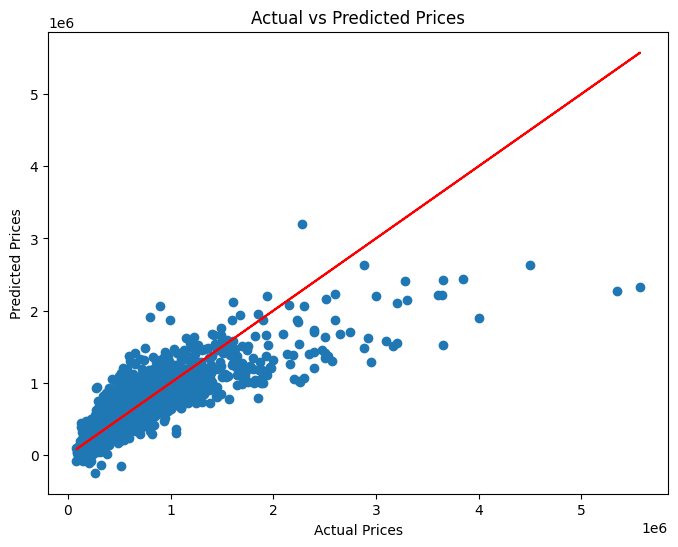

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# DECISION TREE

What is Decision Tree Algorithm?
Decision Tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by splitting the data into subsets based on the value of input features, creating a tree-like structure where each internal node represents a decision based on a feature, each branch represents the outcome of that decision, and each leaf node represents a final prediction or output.

The main idea behind Decision Trees is to recursively partition the data into smaller subsets that are more homogeneous with respect to the target variable. The algorithm selects the feature that best splits the data at each node based on a certain criterion, such as Gini impurity or information gain for classification tasks, and mean squared error for regression tasks.



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
df = pd.read_csv('data_set/adult.csv')
display(df)
df.replace('?' , np.nan ,inplace=True)
df.dropna(inplace=True)
df = df.drop(["fnlwgt",	"education","educational-num","marital-status","occupation","relationship","race"],axis=1)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


,age,workclass,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Male,0,0,40,United-States,<=50K
1,38,Private,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Male,0,0,40,United-States,>50K
3,44,Private,Male,7688,0,40,United-States,>50K
5,34,Private,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...
48837,27,Private,Female,0,0,38,United-States,<=50K
48838,40,Private,Male,0,0,40,United-States,>50K
48839,58,Private,Female,0,0,40,United-States,<=50K
48840,22,Private,Male,0,0,20,United-States,<=50K


In [12]:
y=LabelEncoder().fit_transform(df['income'])
# income column has two values '>50K' and '<=50K' label encoder converts them to 0 and 1
x = df.drop('income',axis=1)
x = pd.get_dummies(x)
#get dummies creates dummy variables for categorical columns 
#example: if a column has values 'A','B','C' it creates 3 columns each having binary values 0 or 1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

In [13]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_pred))
print("Classification Report\n",classification_report(y_test,y_pred))


accuracy_score 0.8070892522112034
confusion_matrix
 [[11114    32]
 [ 2847   931]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     11146
           1       0.97      0.25      0.39      3778

    accuracy                           0.81     14924
   macro avg       0.88      0.62      0.64     14924
weighted avg       0.84      0.81      0.76     14924



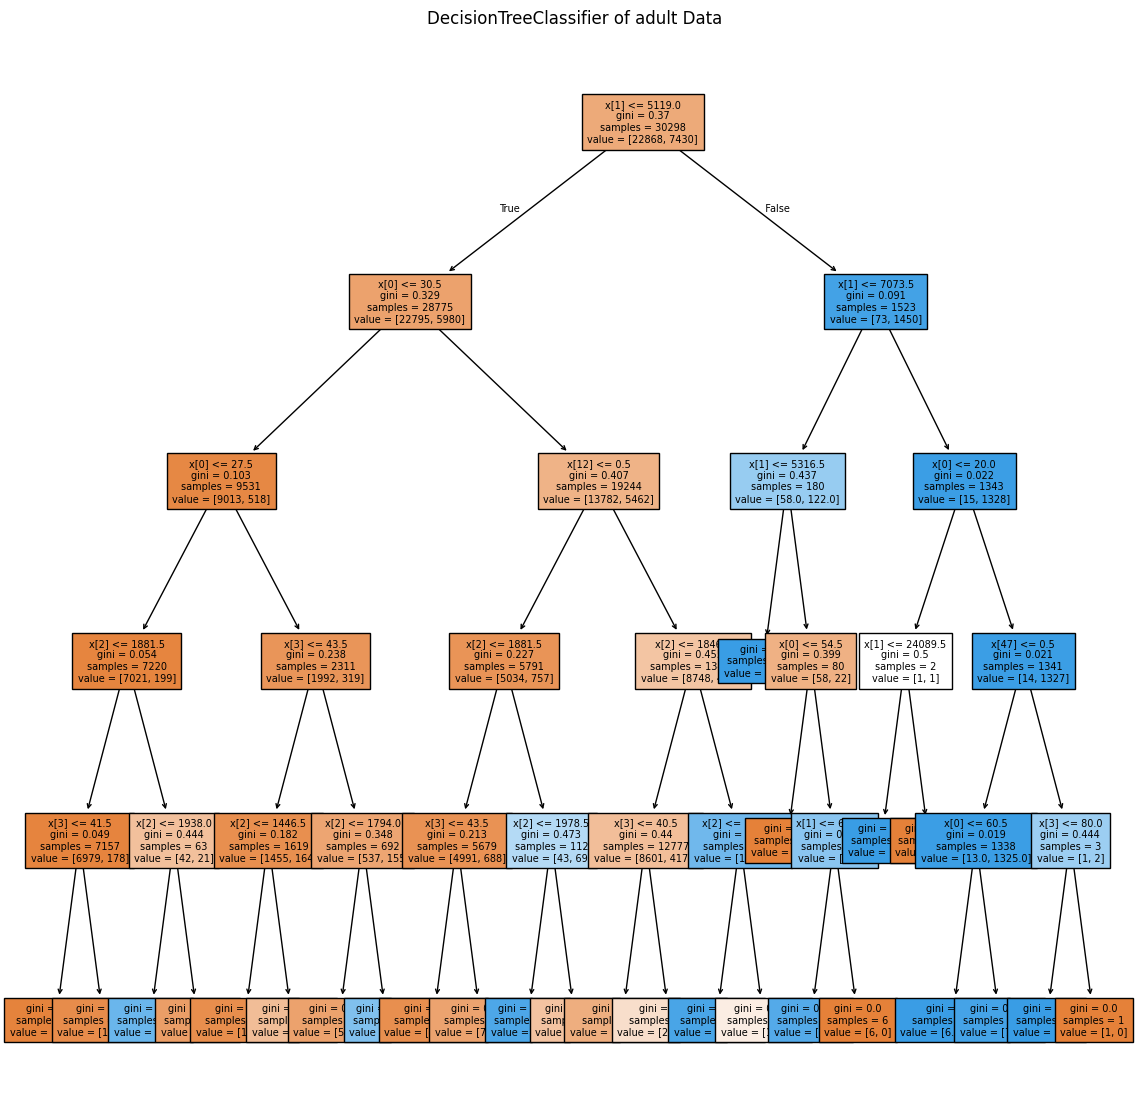

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf,fontsize=7,filled=True)
plt.title("DecisionTreeClassifier of adult Data")
plt.show()


# K Nearest Neighbors (KNN) Algorithm

Meaning:
K Nearest Neighbors (KNN) is a simple, easy-to-implement supervised machine learning algorithm that can be used for both classification and regression tasks. The KNN algorithm assumes that similar data points exist in close proximity to each other. In other words, similar data points are near to each other.
viva Questions:
1. What is the main idea behind the KNN algorithm?
The main idea behind the KNN algorithm is that similar data points are located close to each other.
2. How does the KNN algorithm make predictions for a new data point?
The KNN algorithm makes predictions for a new data point by identifying the 'k' nearest neighbors in the training dataset and using their labels to determine the predicted label for the new data point.
3. What distance metrics are commonly used in the KNN algorithm?
Commonly used distance metrics in the KNN algorithm include Euclidean distance, Manhattan distance, and Minkowski distance.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report   

In [41]:
df  = pd.read_csv('data_set/breast-cancer-wisconsin-data_data.csv')
df = df.drop(['id','Unnamed: 32'],axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [45]:
x = df.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df['diagnosis']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
KNeighborsClassifier(n_neighbors=3)
print("accuracy_score",accuracy_score(y_test,y_pred))


accuracy_score 0.9414893617021277


# K-means clustering: 
kmeans_text = """
K-means clustering — Concept (brief):
K-means is an unsupervised partitioning algorithm that groups n observations into k clusters.
It iteratively assigns points to the nearest cluster centroid and updates centroids as the mean
of assigned points, aiming to minimize the within-cluster sum of squared distances (inertia).
Common steps: initialize k centroids (random or k-means++), repeat assignment and update until
convergence (no change or max iterations). Best for spherical, equal-sized clusters; sensitive
to initialization, scaling, outliers, and choice of k.



In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('data_set/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


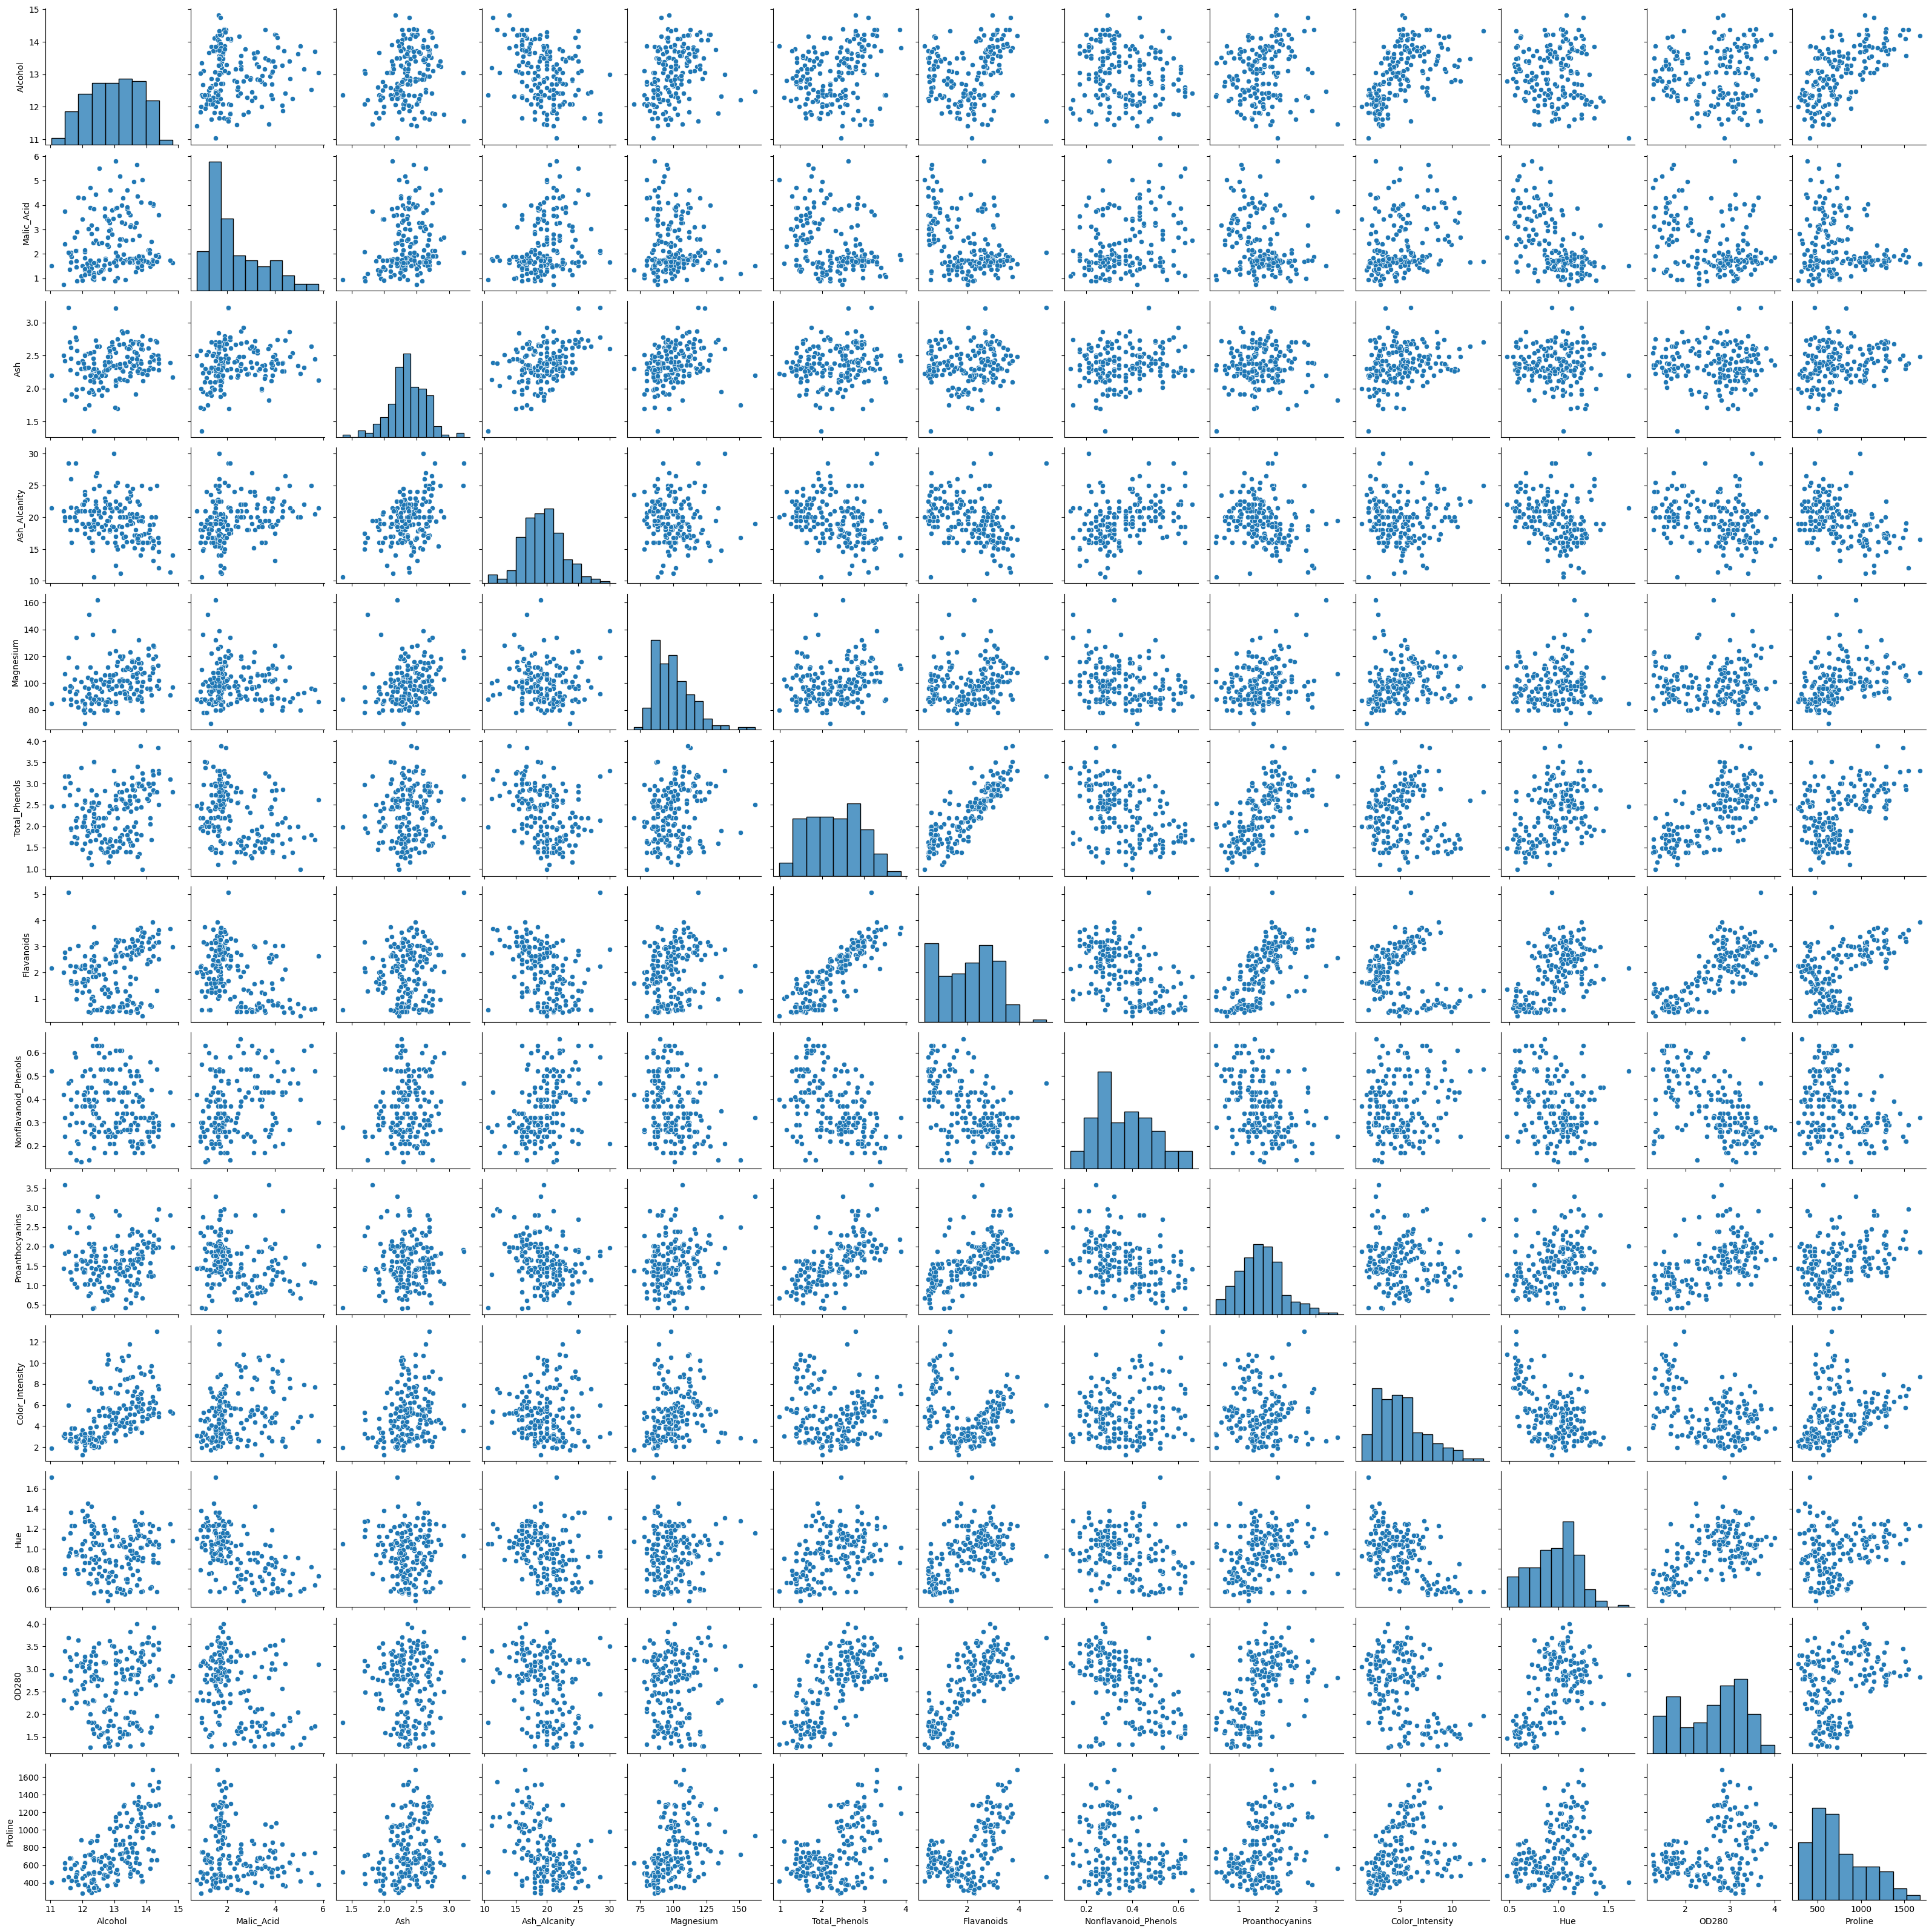

In [54]:
sns.pairplot(df)

In [57]:
selected_featres = df[['OD280', 'Alcohol']]
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(selected_featres)
y_kmeans = kmeans.predict(selected_featres)
print(y_kmeans)

#Centers
centers = kmeans.cluster_centers_
print("Cluster Centeres \n",centers)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 0 0 0 2 0 1 0 1 2 2 2
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster Centeres 
 [[ 2.90290909 12.07981818]
 [ 1.73741379 13.07413793]
 [ 3.14538462 13.71415385]]


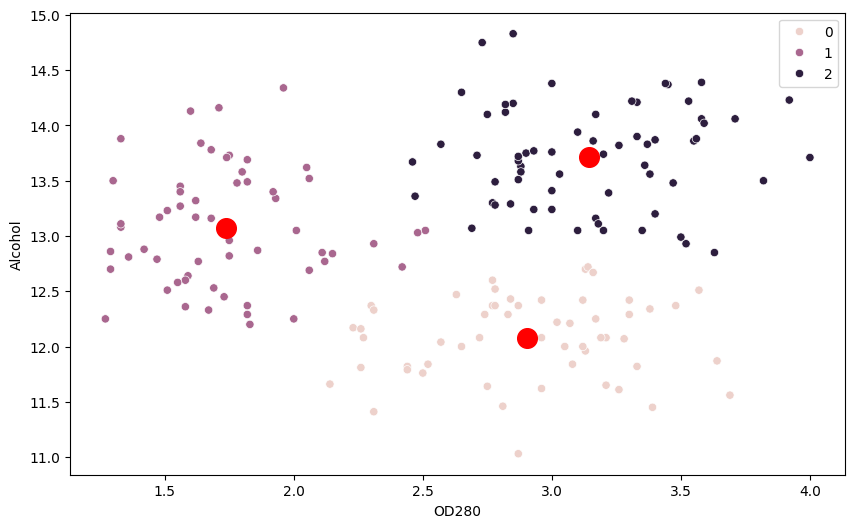

In [63]:
#Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=selected_featres['OD280'], 
    y=selected_featres['Alcohol'], 
    hue=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='red',
    label='Centroids'
)

# Find S Algorithm  


In [67]:
import pandas as pd

df = pd.read_csv('data_set/enjoysport.csv')
print(df)
num_attributes = df.shape[1]-1
print("Number of attributes:",num_attributes)

      Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0   Sunny    Warm   Normal  Strong  Warm     Same        Yes
1   Sunny    Warm     High  Strong  Warm     Same        Yes
2   Rainy    Cold     High  Strong  Warm   Change         No
3   Sunny    Warm     High  Strong  Cool   Change        Yes
4   Sunny    Warm   Normal    Weak  Warm     Same        Yes
5   Rainy    Cold   Normal    Weak  Warm     Same         No
6   Rainy    Cold   Normal  Strong  Warm   Change         No
7   Sunny    Warm   Normal    Weak  Warm     Same        Yes
8   Sunny    Warm   Normal  Strong  Cool   Change         No
9   Rainy    Warm     High  Strong  Warm     Same         No
10  Sunny    Warm     High  Strong  Cool   Change        Yes
11  Rainy    Warm   Normal    Weak  Warm     Same         No
12  Sunny    Warm   Normal  Strong  Warm     Same        Yes
Number of attributes: 6


In [ ]:
x = df.iloc[:,:-1]
#:,:-1 # all rows, all columns except last 
#in python -1 index means last column , -2 means second last column and so on
print(x)
y = df.iloc[:,6]
# all rows, last column ..if we need only final column then -1
print("\n",y)

#convert to numpy arrays
data = df.astype(str).values.tolist()
for i in range(len(data)):
    print(data[i])

      Sky AirTemp Humidity    Wind Water Forecast
0   Sunny    Warm   Normal  Strong  Warm     Same
1   Sunny    Warm     High  Strong  Warm     Same
2   Rainy    Cold     High  Strong  Warm   Change
3   Sunny    Warm     High  Strong  Cool   Change
4   Sunny    Warm   Normal    Weak  Warm     Same
5   Rainy    Cold   Normal    Weak  Warm     Same
6   Rainy    Cold   Normal  Strong  Warm   Change
7   Sunny    Warm   Normal    Weak  Warm     Same
8   Sunny    Warm   Normal  Strong  Cool   Change
9   Rainy    Warm     High  Strong  Warm     Same
10  Sunny    Warm     High  Strong  Cool   Change
11  Rainy    Warm   Normal    Weak  Warm     Same
12  Sunny    Warm   Normal  Strong  Warm     Same

 0     Yes
1     Yes
2      No
3     Yes
4     Yes
5      No
6      No
7     Yes
8      No
9      No
10    Yes
11     No
12    Yes
Name: EnjoySport, dtype: object
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold'

In [96]:
#Hypothesis initialization
hyp = ['0']*num_attributes
print("Initial Hypothesis:",hyp)

#Finding the first positive example
pos_index = 0
for i in range(len(data)):
    if data[i][num_attributes] == 'yes':
        pos_index = i
        break
if pos_index is None:
        print("No positive example found in the dataset.")
else : 
    for j in range(num_attributes):
        hyp[j] = data[pos_index][j]
print("First positive example found at index",pos_index)
print("Initial Hypothesis after first positive example:",hyp)


Initial Hypothesis: ['0', '0', '0', '0', '0', '0']
First positive example found at index 0
Initial Hypothesis after first positive example: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']


In [103]:
print('\nFind S: Finding a Maximally Specific Hypothesis\n')
if pos_index is not None:
    for i in range(pos_index+1, len(data)):
        if data[i][num_attributes].strip().lower() in ('yes','y','true','1'):
            for j in range(num_attributes):
                if data[i][j] != hyp[j]:
                    hyp[j] = '?'
            print(f'For training instance No:{i+1} the hypothesis is', hyp)
else:
    print('Skipping Find-S since no positive example was available.')


Find S: Finding a Maximally Specific Hypothesis

For training instance No:2 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']
For training instance No:4 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']
For training instance No:5 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']
For training instance No:8 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']
For training instance No:11 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']
For training instance No:13 the hypothesis is ['Sunny', 'Warm', '?', '?', '?', '?']


In [104]:
print("\nFinal Hypothesis:",hyp)


Final Hypothesis: ['Sunny', 'Warm', '?', '?', '?', '?']


# LOGISTIC REGRESSION


In [16]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
import seaborn as sns

In [17]:
diabetes=load_diabetes()
x,y=diabetes.data,diabetes.target
y_binary=(y>np.median(y)).astype(int)
y_binary

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y_binary,test_size=0.2,random_state=44)

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)
x_train

array([[-0.6731859 , -0.91571921,  1.02726635, ..., -0.01786768,
         1.38719819, -0.48937069],
       [ 0.23555071, -0.91571921, -0.50298977, ..., -1.57714882,
        -1.44927899,  0.28106077],
       [ 1.59865561,  1.09203781, -0.48015013, ...,  1.74412   ,
        -0.7169896 ,  1.22269921],
       ...,
       [ 0.61419096,  1.09203781, -0.13755547, ..., -0.13481377,
        -0.5579455 ,  1.22269921],
       [-0.44600175, -0.91571921, -1.11966015, ..., -0.79750825,
        -1.49027957, -0.06135321],
       [ 0.23555071, -0.91571921,  0.59331312, ..., -0.01786768,
         1.26419646, -0.40376719]], shape=(353, 10))

In [22]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy
print(confusion_matrix(y_test,y_pred))

[[31  4]
 [15 39]]


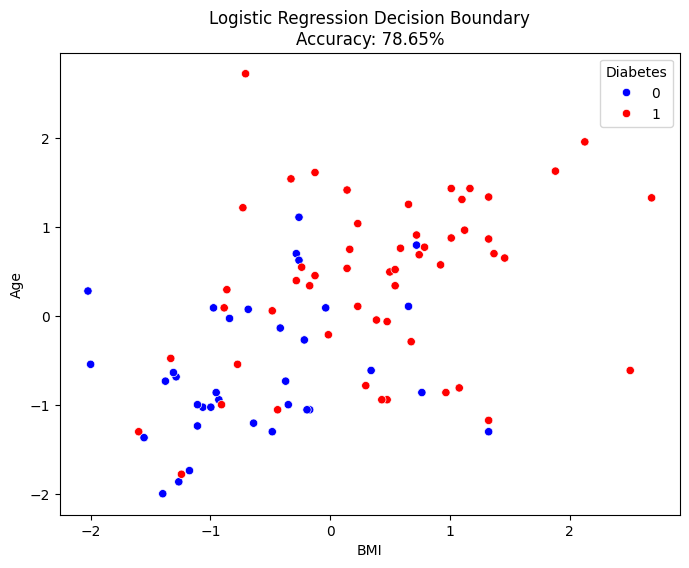

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test[:, 2], y=x_test[:, 8], hue=y_test, palette={
0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
 accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

# SVM

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
df = pd.read_csv("data_set/smaller_adult.csv")
display(df)
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,age,workclass,educational-num,occupation,gender,hours-per-week,income
0,25,Private,7,Machine-op-inspct,Male,40,<=50K
1,38,Private,9,Farming-fishing,Male,50,<=50K
2,28,Local-gov,12,Protective-serv,Male,40,>50K
3,44,Private,10,Machine-op-inspct,Male,40,>50K
4,18,?,10,?,Female,30,<=50K
...,...,...,...,...,...,...,...
3569,49,?,9,?,Female,40,<=50K
3570,29,Private,11,Prof-specialty,Male,40,>50K
3571,25,Private,9,Craft-repair,Male,50,<=50K
3572,47,Private,9,Exec-managerial,Female,50,>50K


,age,workclass,educational-num,occupation,gender,hours-per-week,income
0,25,Private,7,Machine-op-inspct,Male,40,<=50K
1,38,Private,9,Farming-fishing,Male,50,<=50K
2,28,Local-gov,12,Protective-serv,Male,40,>50K
3,44,Private,10,Machine-op-inspct,Male,40,>50K
5,34,Private,6,Other-service,Male,30,<=50K
...,...,...,...,...,...,...,...
3568,56,Private,3,Machine-op-inspct,Male,40,>50K
3570,29,Private,11,Prof-specialty,Male,40,>50K
3571,25,Private,9,Craft-repair,Male,50,<=50K
3572,47,Private,9,Exec-managerial,Female,50,>50K


In [29]:
X=df[['age','workclass','educational-num','occupation','gender',
       'hours-per-week']]
y = LabelEncoder().fit_transform(df['income'])
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=20)

In [31]:
clf = SVC(kernel="linear", gamma = 'auto')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.7846750727449079

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       777
           1       0.63      0.31      0.42       254

    accuracy                           0.78      1031
   macro avg       0.72      0.63      0.64      1031
weighted avg       0.76      0.78      0.76      1031


Confusion Matrix:
 [[730  47]
 [175  79]]


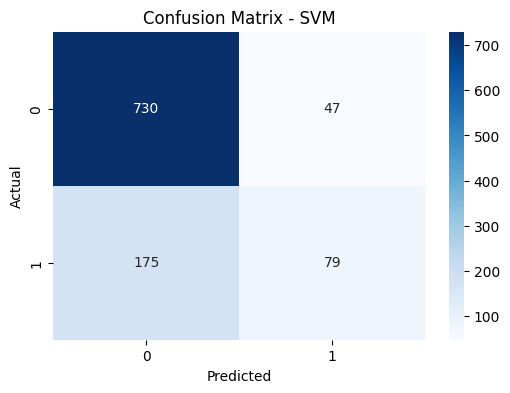

In [32]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()